# **Notebook Overview: Credit Card Fraud Detection**
This notebook builds a **machine learning pipeline** to detect fraudulent credit card transactions. Given the highly **imbalanced dataset**, it employs **exploratory data analysis, preprocessing, and model training** to improve detection accuracy.

## **Key Steps:**
1. **Data Loading & Exploration** – Reads transaction data and analyzes feature distributions.
2. **Preprocessing** – Scales numerical features and handles class imbalance.
3. **Model Training** – Trains **Random Forest** and **XGBoost** classifiers.
4. **Ensemble Learning** – Combines both models for better fraud detection.
5. **Evaluation** – Assesses performance using **precision, recall, F1-score, and ROC-AUC**.

The final ensemble model enhances fraud detection while minimizing false positives.


## **1. Importing Libraries**
- Loads essential Python libraries for:
  - Data handling: `pandas`, `numpy`
  - Visualization: `matplotlib`, `seaborn`
  - Preprocessing: `StandardScaler`
  - Model building: `RandomForestClassifier`, `XGBoost`


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## **2. Load Data**
- Reads the dataset (`creditcard.csv`).
- Displays initial rows to understand the structure.

In [8]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## **3. Exploratory Data Analysis (EDA)**
- **Feature Distribution Visualization**: Analyzes how different features contribute to fraud detection.


In [13]:
# Checking for missing values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**Next, we look at summary statistics to spot unusual values, skewed distributions, or potential outliers.**

**Since this is a Classification problem let's check for Balance of the Target Variable**

In [23]:
# Check class distribution  
df['Class'].value_counts(normalize=True) * 100 

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

### Visualize Feature Distributions
**To understand how numerical features are distributed, let’s plot histograms.**

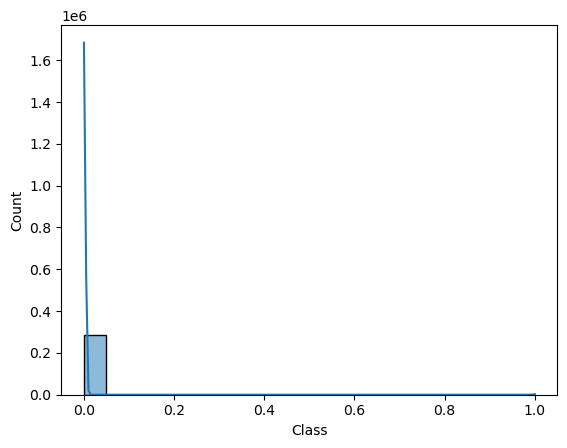

In [26]:
# Check for Class value Distribution
sns.histplot(df['Class'], kde=True)  
plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

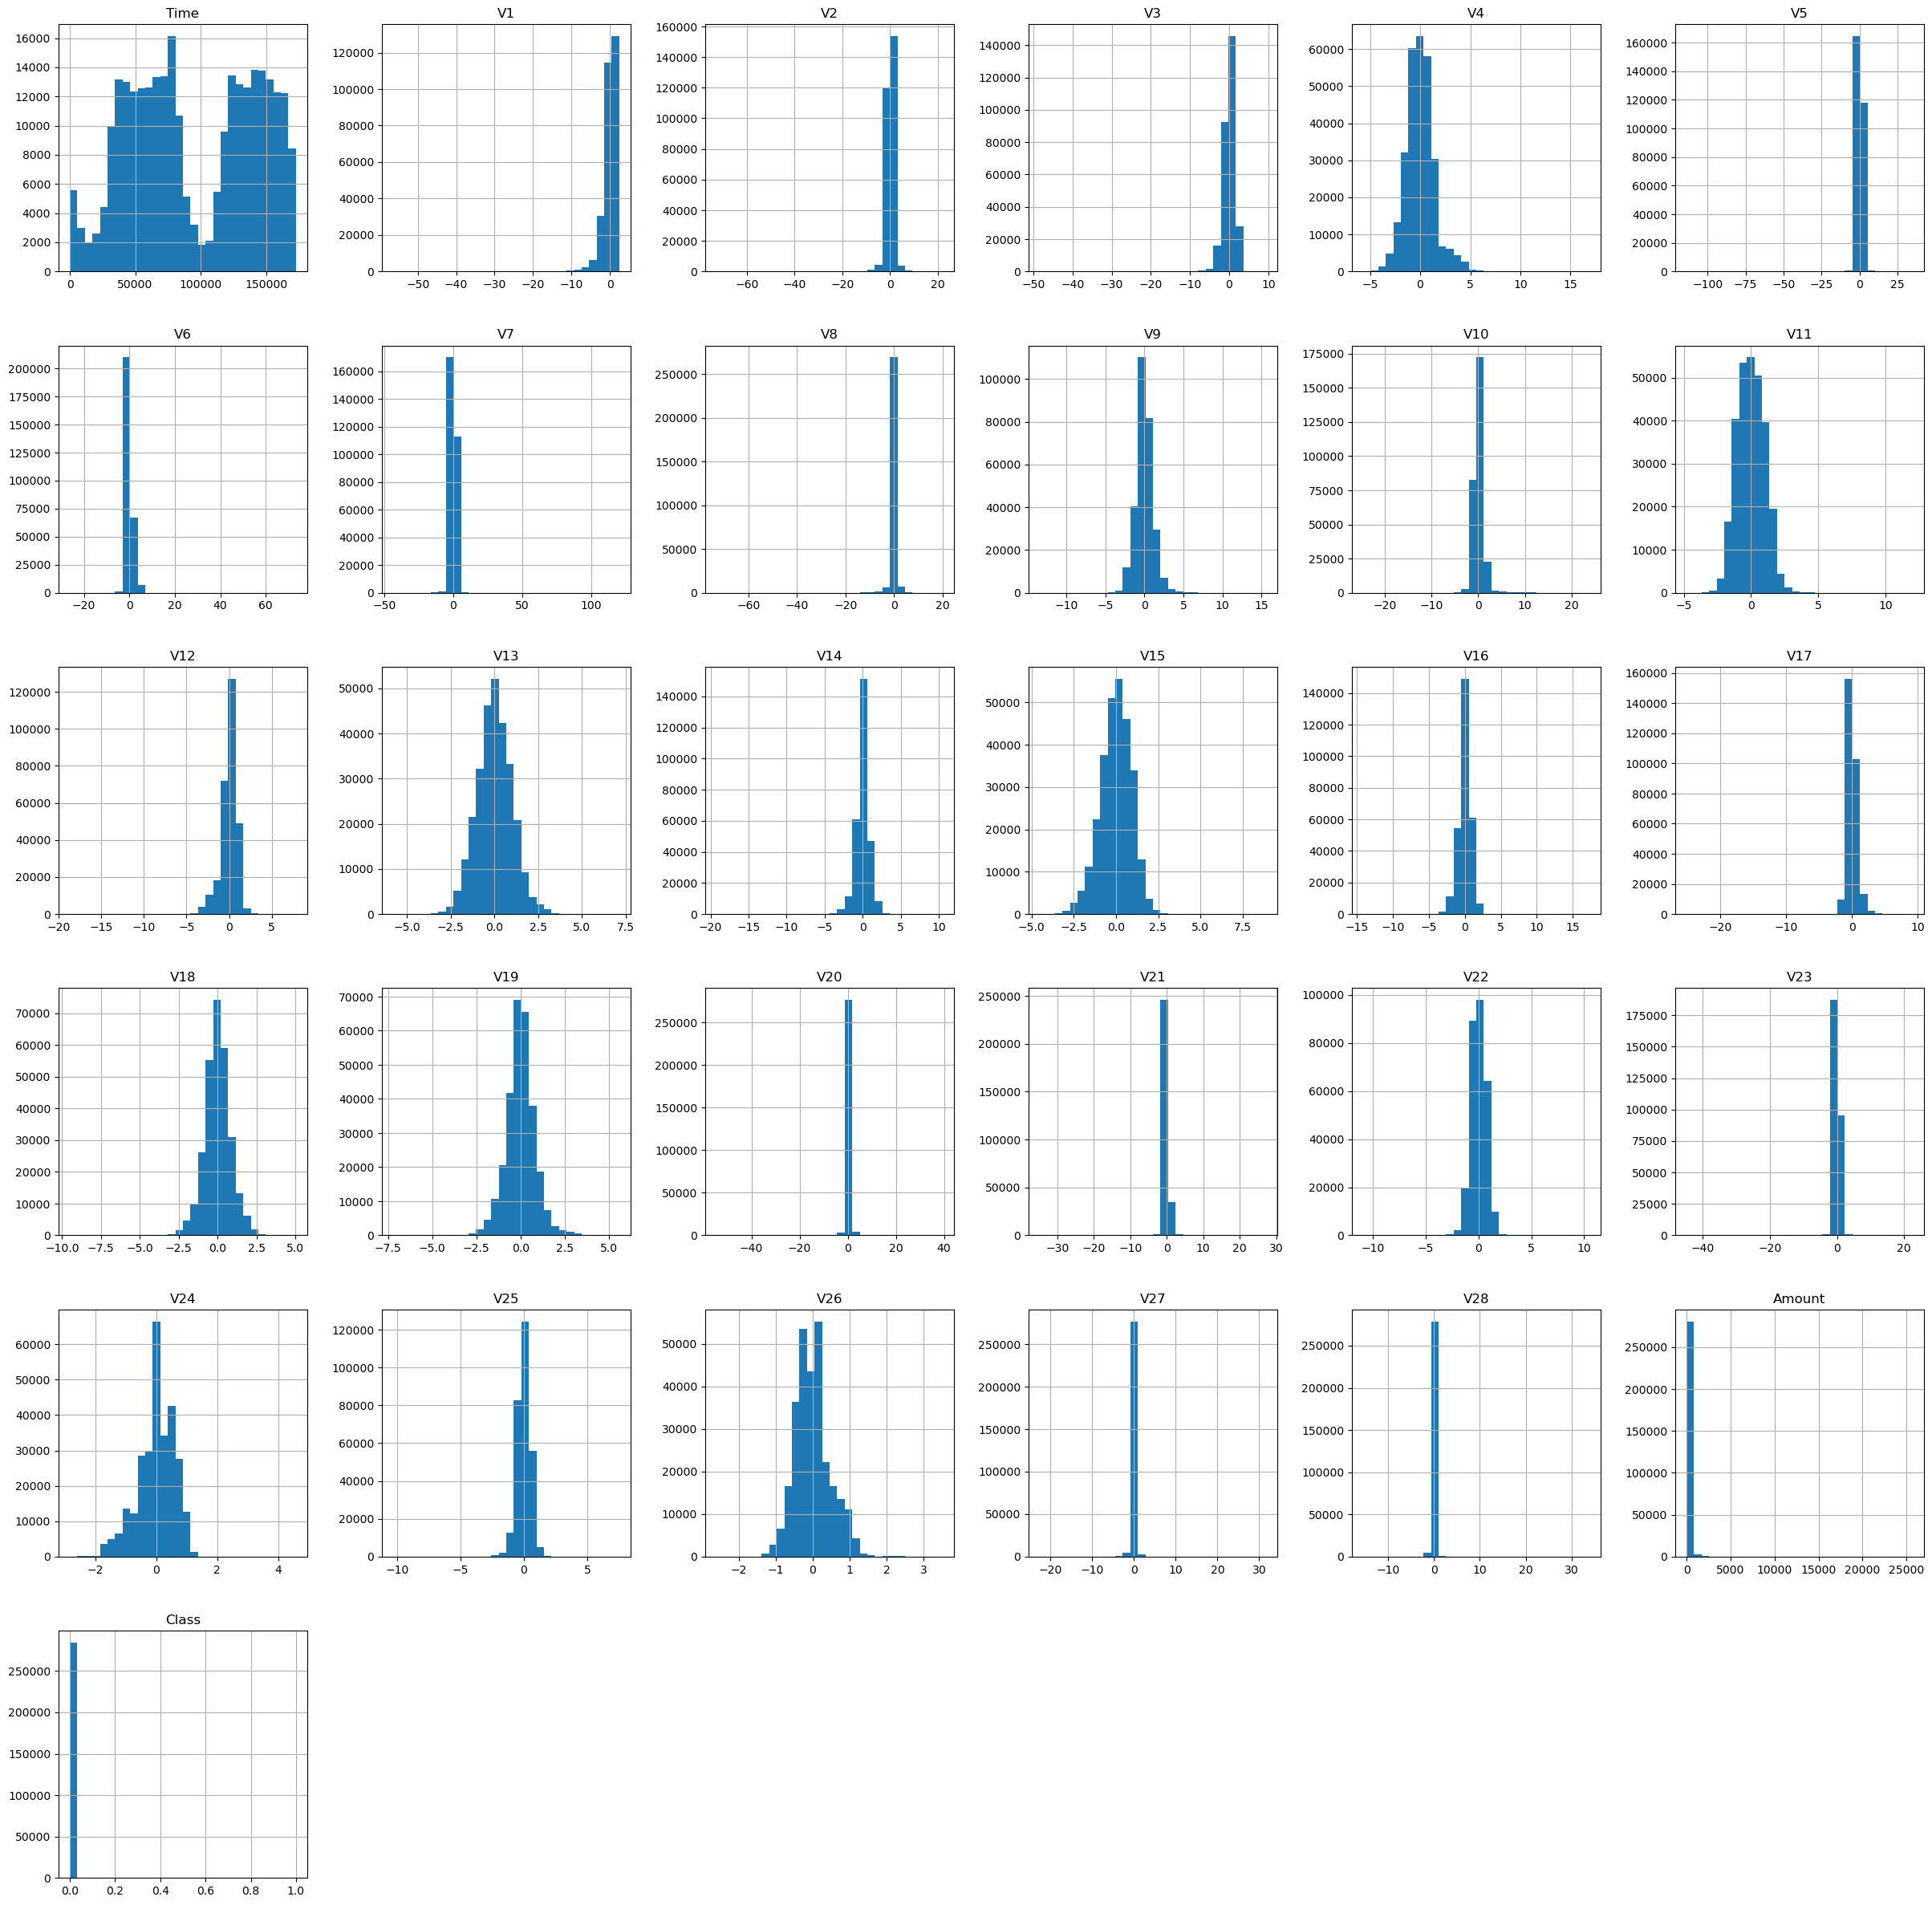

In [27]:
df.hist(bins=30, figsize=(30,30))

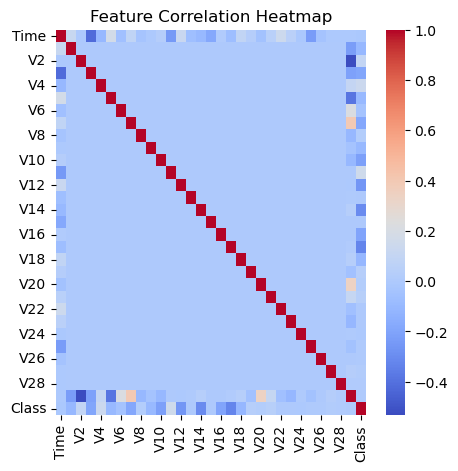

In [28]:
# plot a correlation heatmap to understand relationship between features
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

<Axes: >

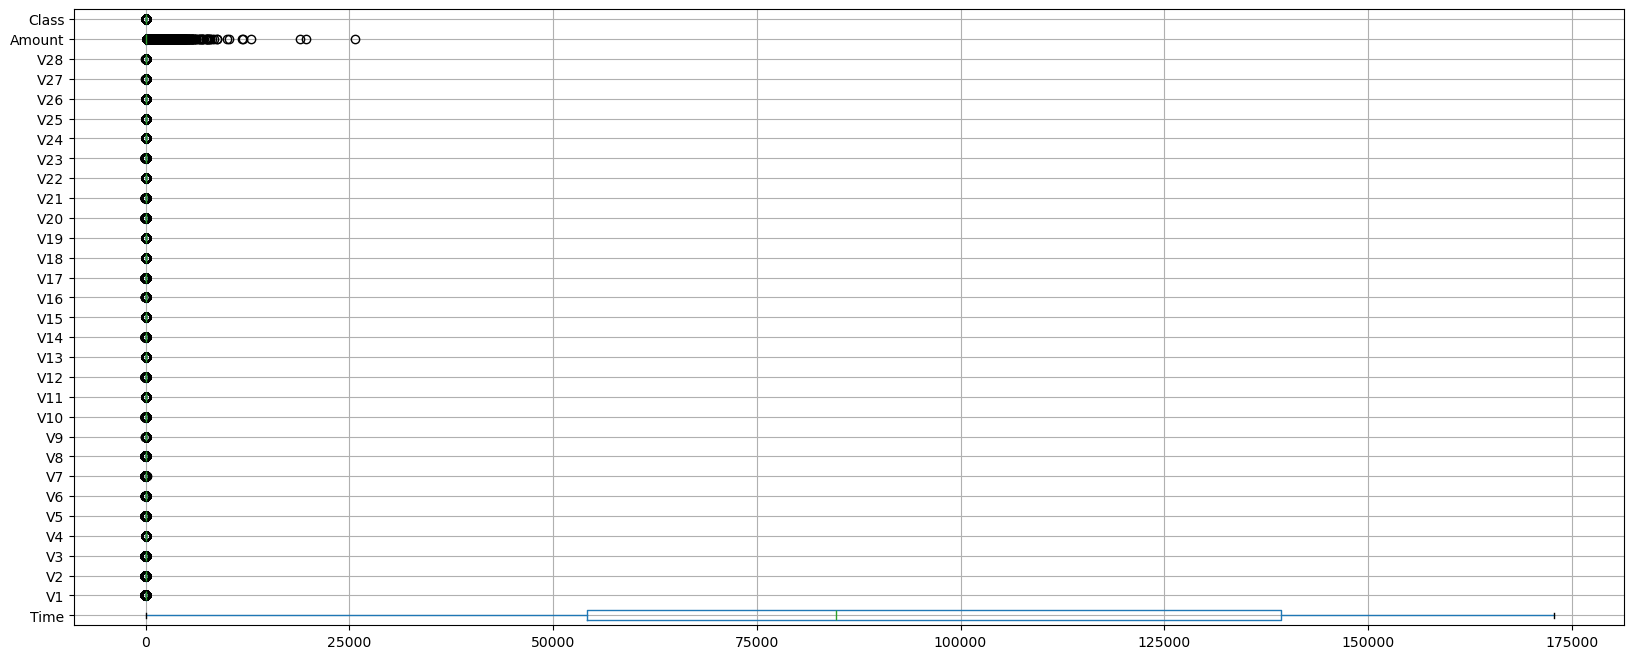

In [32]:
df.boxplot(figsize=(20,8), vert=False)

## **4. Data Preprocessing**
- Normalizes numerical features.
- Handles missing values (if any).
- Addresses class imbalance (oversampling/undersampling).

In [35]:
# Scale 'Amount' and 'Time' columns
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [37]:
# Separate features and target column
X = df.drop(columns=['Class'])
y = df['Class']

## **5. Splitting and Sampling**
- Splits the dataset into training and testing sets.

In [40]:
# Split data into train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [42]:
print(type(X_train))  
print(X_train.columns) 

<class 'pandas.core.frame.DataFrame'>
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


## **6. Train Supervised Learning Model (Random Forest)**
- Trains a **Random Forest model** to classify transactions as fraudulent or not.

In [52]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, class_weight={0: 1, 1: 20})
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 20}, n_estimators=200)

In [54]:
# Make Predictions using Random Forest
y_probs = rf_model.predict_proba(X_test)[:, 1]  
y_pred_adjusted = (y_probs > 0.3).astype(int) 
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_adjusted, target_names=['Not Fraud', 'Fraud']))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_adjusted))

Random Forest Performance:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.91      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9285010852962456


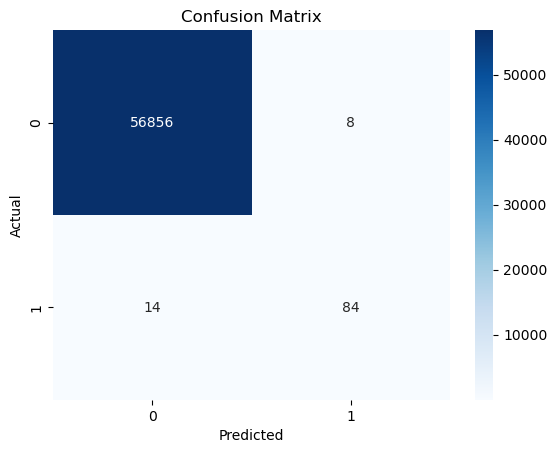

In [58]:
# Compare Training vs. Test Performance
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## **7. Train XGBoost Model**
- Trains an **XGBoost model**, known for high performance on tabular data.

In [61]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=10, n_estimators=300, max_depth=5, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
# Make Prediction with xgboost
y_probs = xgb_model.predict_proba(X_test)[:, 1]  
y_pred_adjusted = (y_probs > 0.6).astype(int)  

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_adjusted, target_names=['Not Fraud', 'Fraud']))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_adjusted))

XGBoost Performance:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.90      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9233902515705213


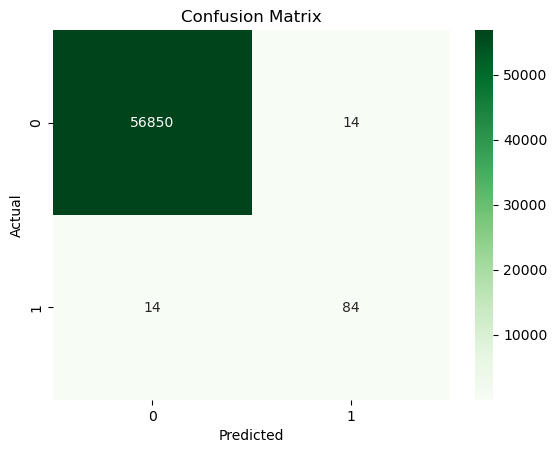

In [82]:
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **8. Ensemble: XGBoost + Random Forest**
- Combines predictions from both models for improved accuracy.
- Evaluates performance using metrics like precision, recall, and ROC-AU
- 
*Using Soft Voting (average of probabilities) to combine strengths of both model.*

In [68]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight={0: 1, 1: 20}, random_state=42)
rf.fit(X_train, y_train)

# Train XGBoost
xgb = XGBClassifier(scale_pos_weight=10, learning_rate=0.05, n_estimators=300, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Ensemble Model
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    voting='soft'
)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 20},
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, g...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [72]:
# Predictions
y_pred_prob_ensemble = ensemble.predict_proba(X_test)[:, 1]
y_pred_ensemble = (y_pred_prob_ensemble >= 0.2).astype(int)

In [73]:
# Evaluate Ensemble Model
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble, target_names=['Not Fraud', 'Fraud']))
print("Ensemble ROC-AUC Score:", roc_auc_score(y_test, y_pred_ensemble))

Ensemble Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.83      0.88      0.85        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Ensemble ROC-AUC Score: 0.9386172378349201


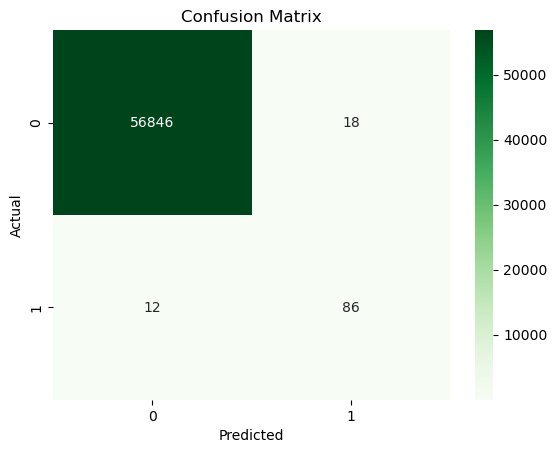

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()